In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("bank_transactions.csv",encoding='unicode_escape')

In [3]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
data.shape

(1048567, 9)

In [5]:
city_data=data[['CustLocation','CustomerID']].drop_duplicates()
city_data.groupby(['CustLocation'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,CustLocation,CustomerID
5268,MUMBAI,101729
5792,NEW DELHI,83564
772,BANGALORE,80347
3083,GURGAON,72856
2075,DELHI,70067
...,...,...
6864,RAJAHMUNDRY URBAN,1
2519,EAST RIFFA,1
6873,RAJARHAT KOLKATA,1
6874,RAJASAMAND,1


In [6]:
data = data[(data['CustLocation'] == 'MUMBAI') | (data['CustLocation'] == 'NEW DELHI') | (data['CustLocation'] == 'BANGLORE') | (data['CustLocation'] == 'GURGAON') | (data['CustLocation'] == 'DELHI')].copy()

In [7]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.0
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.0
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.0


In [8]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                1579
CustGender                  788
CustLocation                  0
CustAccountBalance          745
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [9]:
data = data[data['CustomerID'].notnull()]

In [10]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.0
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.0
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.0


In [11]:
data.CustAccountBalance.min()

0.0

In [12]:
data.rename(columns = {"TransactionAmount (INR)" : "TransactionAmount"}, inplace = True)
data.TransactionAmount.min()

0.0

In [13]:
data=data[data['CustAccountBalance']>0]

In [14]:
data=data[data['TransactionAmount']>0]

In [15]:
data.dtypes

TransactionID          object
CustomerID             object
CustomerDOB            object
CustGender             object
CustLocation           object
CustAccountBalance    float64
TransactionDate        object
TransactionTime         int64
TransactionAmount     float64
dtype: object

In [16]:
data['TransactionTime'] = data['TransactionTime'].astype(str)

In [17]:
data['TransactionTime'] = data['TransactionTime'].str.zfill(6)

In [18]:
data['Hour'] = data['TransactionTime'].str[:2]
data['Minute'] = data['TransactionTime'].str[2:4]
data['Second'] = data['TransactionTime'].str[4:6]

In [19]:
data['Time'] = data['Hour'] + ':' + data['Minute'] + ':' + data['Second']

In [20]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Hour,Minute,Second,Time
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,14,27,12,14:27:12
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,14,27,14,14:27:14
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.0,17,38,06,17:38:06
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.0,17,05,37,17:05:37
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.0,19,28,25,19:28:25


In [21]:
data.drop(['Hour', 'Minute', 'Second','TransactionTime'], axis=1, inplace=True)

In [22]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount,Time
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,459.0,14:27:12
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,2060.0,14:27:14
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,566.0,17:38:06
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,148.0,17:05:37
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,833.0,19:28:25


In [23]:
data['TransactionDate'] = data['TransactionDate'].astype(str)
data['Time'] = data['Time'].astype(str)

In [24]:
data['Transaction_DateTime'] = data['TransactionDate'] +' '+ data['Time']

In [25]:
data.drop(['TransactionDate','Time'], axis=1, inplace=True)

In [26]:
data.Transaction_DateTime=pd.to_datetime(data['Transaction_DateTime'])

In [27]:
ref_date = data['Transaction_DateTime'].max()

In [28]:
Latest_date = dt.datetime(2016,12,10)

RFM_score = data.groupby('CustomerID').agg({'Transaction_DateTime': lambda x : (Latest_date-x.max()).days, 'TransactionID': lambda x: len(x), 'TransactionAmount': lambda x: x.sum()})

In [29]:
RFM_score.Transaction_DateTime=RFM_score.Transaction_DateTime.astype(int)

In [30]:
RFM_score.rename(columns={'Transaction_DateTime': 'Recency', 
                         'TransactionID': 'Frequency', 
                         'TransactionAmount': 'Monetary'}, inplace=True)

In [31]:
RFM_score.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,92,1,356.0
1,C1010012,117,1,1499.0
2,C1010014,154,2,1455.0
3,C1010028,102,1,557.0
4,C1010035,336,1,50.0


C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

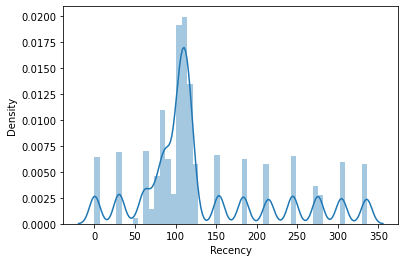

In [32]:
sns.distplot(RFM_score.Recency)

In [33]:
RFM_score.Frequency.describe()

count    313434.000000
mean          1.057983
std           0.243972
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: Frequency, dtype: float64

In [34]:
RFM_score.Monetary.describe()

count    3.134340e+05
mean     1.774206e+03
std      7.462617e+03
min      1.000000e-02
25%      2.000000e+02
50%      5.380000e+02
75%      1.500000e+03
max      1.560035e+06
Name: Monetary, dtype: float64

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

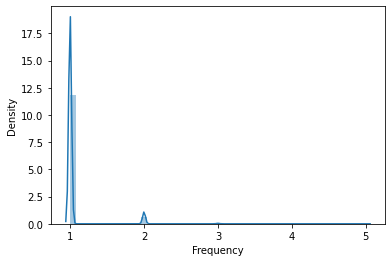

In [35]:
sns.distplot(RFM_score.Frequency)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

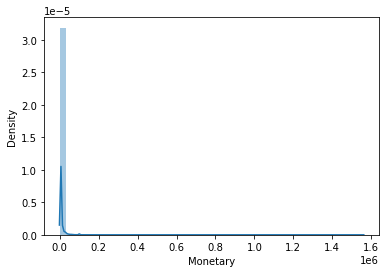

In [36]:
sns.distplot(RFM_score.Monetary)

In [37]:
quantiles = RFM_score.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [38]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [39]:
RFM_score['R']=RFM_score['Recency'].apply(RScoring, args=('Recency', quantiles))
RFM_score['F']=RFM_score['Frequency'].apply(FnMScoring, args=('Frequency', quantiles))
RFM_score['M']=RFM_score['Monetary'].apply(FnMScoring, args=('Monetary', quantiles))


In [40]:
RFM_score.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
C1010011,92,1,356.0,3,1,2
C1010012,117,1,1499.0,2,1,3
C1010014,154,2,1455.0,2,4,3
C1010028,102,1,557.0,3,1,3
C1010035,336,1,50.0,1,1,1


In [41]:
RFM_score['RFMgroup']=RFM_score.R*100 + RFM_score.F*10 + RFM_score.M

In [42]:
RFM_score[RFM_score['RFMgroup']==444].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup
0,C4916245,31,2,190537.05,4,4,4,444
1,C7027980,82,2,135022.70,4,4,4,444
2,C4715730,78,2,126001.13,4,4,4,444
3,C3420190,86,2,114058.00,4,4,4,444
4,C3237614,86,2,113000.00,4,4,4,444
5,C3937666,87,2,103715.00,4,4,4,444
6,C2014069,61,2,100015.00,4,4,4,444
7,C2721785,30,2,85100.00,4,4,4,444
8,C4238966,82,2,81936.00,4,4,4,444
9,C8010028,61,2,78227.90,4,4,4,444


In [43]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [44]:
RFM_score['Monetary'] = [handle_neg_n_zero(x) for x in RFM_score.Monetary]

Log_Tfd_Data = RFM_score[['Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

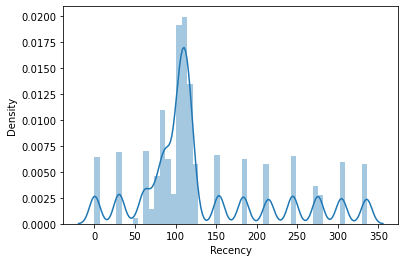

In [45]:
sns.distplot(RFM_score.Recency)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

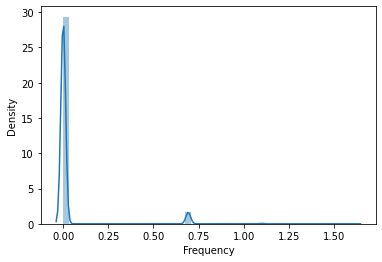

In [46]:
sns.distplot(Log_Tfd_Data.Frequency)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

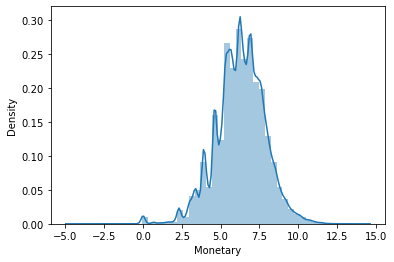

In [47]:
sns.distplot(Log_Tfd_Data.Monetary)

In [48]:
scale = StandardScaler()
Scaled_Data = scale.fit_transform(Log_Tfd_Data)

Scaled_Data = pd.DataFrame(Scaled_Data, index = RFM_score.index, columns = Log_Tfd_Data.columns)

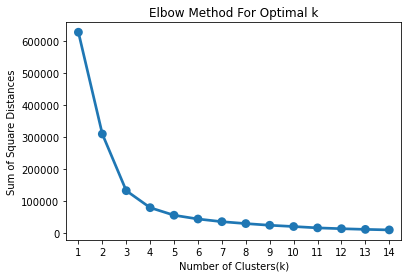

In [49]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000, random_state=100)
KMean_clust.fit(Scaled_Data)

RFM_score['Cluster'] = KMean_clust.labels_
RFM_score.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Cluster
CustomerID,,,,,,,,
C1010011,92,1,356.0,3,1,2,312,0
C1010012,117,1,1499.0,2,1,3,213,1
C1010014,154,2,1455.0,2,4,3,243,2
C1010028,102,1,557.0,3,1,3,313,1
C1010035,336,1,50.0,1,1,1,111,0


In [51]:
RFM_score['Cluster'].value_counts()

1    164657
0    131346
2     17431
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

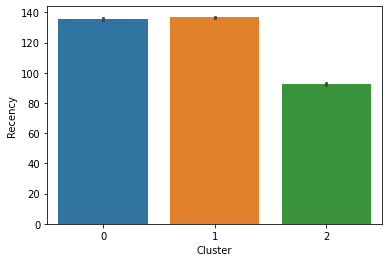

In [52]:
sns.barplot(x=RFM_score.Cluster, y=RFM_score.Recency)

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

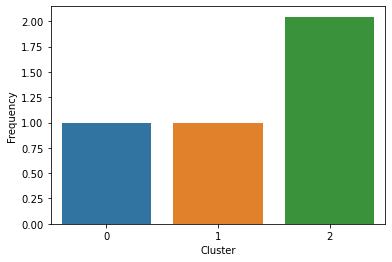

In [53]:
sns.barplot(x=RFM_score.Cluster, y=RFM_score.Frequency)

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

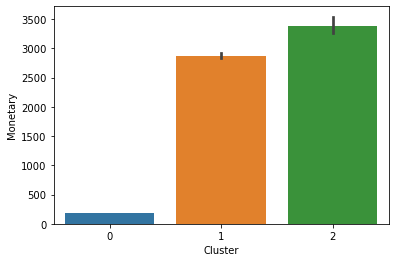

In [54]:
sns.barplot(x=RFM_score.Cluster, y=RFM_score.Monetary)

In [56]:
RFM_score[RFM_score.Cluster==0]['RFMgroup'].value_counts()

311    20441
111    19831
411    19336
211    19105
112    13429
412    13197
212    13168
312    12839
Name: RFMgroup, dtype: int64

In [57]:
RFM_score[RFM_score.Cluster==1]['RFMgroup'].value_counts()

213    19530
113    19259
413    18178
214    17965
114    17783
313    17684
414    16130
314    15794
112     5731
212     5647
412     5543
312     5413
Name: RFMgroup, dtype: int64

In [58]:
RFM_score[RFM_score.Cluster==2]['RFMgroup'].value_counts()

444    3848
344    2690
443    2376
244    1752
343    1692
243    1065
442    1063
342     742
144     591
242     500
143     355
441     280
341     178
142     151
241     110
141      38
Name: RFMgroup, dtype: int64

In [59]:
RFM_score['CustomerType']=RFM_score['Cluster']

In [60]:
RFM_score['CustomerType'].replace({0:'New Customers', 1:'Regular Customer', 2:'Best Customer'}, inplace=True)

In [61]:
RFM_score.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Cluster,CustomerType
CustomerID,,,,,,,,,
C1010011,92,1,356.0,3,1,2,312,0,New Customers
C1010012,117,1,1499.0,2,1,3,213,1,Regular Customer
C1010014,154,2,1455.0,2,4,3,243,2,Best Customer
C1010028,102,1,557.0,3,1,3,313,1,Regular Customer
C1010035,336,1,50.0,1,1,1,111,0,New Customers
